In [1]:
#import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [2]:
#Load Dataset
df = pd.read_csv('/kaggle/input/vehicle-price-detecion/dataset.csv')
df.head()

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [5]:
#Drop Rows with Missing Target
df = df.dropna(subset=['price'])


In [6]:
#feature selection
features = [
    "make", "model", "year", "engine", "cylinders", "fuel",
    "mileage", "transmission", "trim", "body", "doors",
    "exterior_color", "interior_color", "drivetrain"
]
X = df[features]
y = df['price']


In [7]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [8]:
#Identify Column Types
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = X.select_dtypes(include=["float64", "int64"]).columns.tolist()


In [9]:
#Preprocessing Pipelines

from sklearn.pipeline import Pipeline

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numerical_cols),
    ("cat", categorical_transformer, categorical_cols)
])


In [10]:
#Model Pipeline
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])


In [12]:
#Train Model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['year', 'cylinders',
                                                   'mileage', 'doors']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['make', 'model', 'engine',
                                                   'fuel', 'transmission',
                                                   'trim', 'body',
                                                   'exterior_color',
                                                   'interior_color',
                                                   'drivetrain'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [13]:
#make prediction
y_pred = model.predict(X_test)


In [14]:
#Evaluate Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.3f}")


Mean Squared Error: 66176956.27
R² Score: 0.783


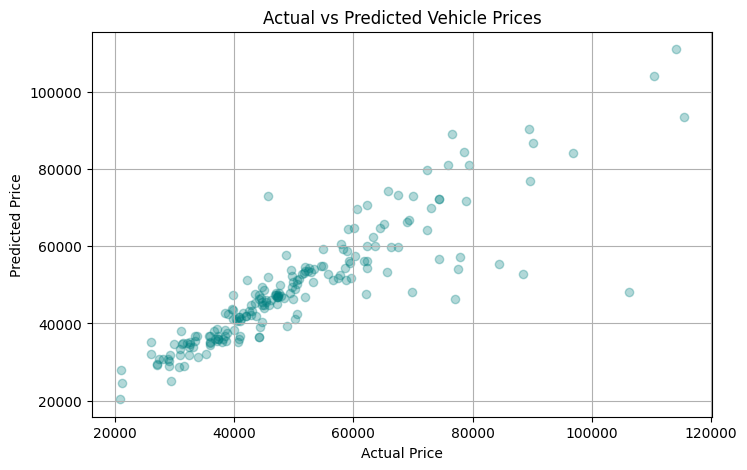

In [15]:
#Visualize prediction
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.3, color='teal')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Vehicle Prices")
plt.grid(True)
plt.show()


In [16]:
# Query the Trained Model with Sample Input
# Create a sample vehicle entry (same format as training features)
sample_data = pd.DataFrame([{
    "make": "Toyota",
    "model": "Camry",
    "year": 2020,
    "engine": "2.5L I4",
    "cylinders": 4,
    "fuel": "Gasoline",
    "mileage": 30000,
    "transmission": "Automatic",
    "trim": "LE",
    "body": "Sedan",
    "doors": 4,
    "exterior_color": "White",
    "interior_color": "Black",
    "drivetrain": "Front-wheel Drive"
}])

# Predict price
predicted_price = model.predict(sample_data)
print(f"Predicted Price for Sample Vehicle: ${predicted_price[0]:,.2f}")


Predicted Price for Sample Vehicle: $27,254.24
